# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Part two

Your task is to prepare an analytical response for Skillbox's SMM department. <br> The object of analysis is [public Skillbox Vkontakte](https://vk.com/skillbox_education). <br><br>
Connect to the VK API and upload posts from the Skillbox public wall for the period of interest (determine yourself and justify). Analyze the influence of various factors (such as posting time) on user engagement (number of likes, comments, votes in polls). Make analytics on the headings (examples of headings: design battle, management game) that are in the public. You can select the desired posts using regular expressions. Make a list of recommendations for the SMM department based on the results of the analysis. <br><br>

Additional instructions for working with the VK API are located [here](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [2]:
### YOUR CODE HERE ###

import sqlalchemy
import psycopg2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import requests
from datetime import datetime, timedelta
import re

def getjson(url):
    response = requests.get(url)
    response = response.json()
    return response

# link to refresh token
# https://oauth.vk.com/authorize?client_id=1&display=page&redirect_uri=http://oauth.vk.com/blank.html&scope=all&response_type=token
vk_token = '...'



In [3]:
list = []

for j in range (100,1300,100):
    url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&offset=' + str(j) + '&count=100&v=5.92'
    main_resp = getjson(url)
    for i in range(0,100):
        dic = {}
        post_date = main_resp['response']['items'][i]['date'] #date and time in UNIX
        dic['post_date'] = (datetime.fromtimestamp(post_date) - timedelta(hours=0)).strftime('%Y-%m-%d %H:%M:%S') #date and time in standard format
        dic['post_id'] = main_resp['response']['items'][i]['id'] #id of post
        dic['post_type'] = main_resp['response']['items'][i]['post_type'] #type of post
        dic['comments_count'] = main_resp['response']['items'][i]['comments']['count'] #number of comments
        dic['likes_count'] = main_resp['response']['items'][i]['likes']['count'] #number of likes
        dic['repost_count'] = main_resp['response']['items'][i]['reposts']['count'] #number of reposts
        dic['views_count'] = main_resp['response']['items'][i]['views']['count'] #number of views
        dic['text'] = main_resp['response']['items'][i]['text'] #text
        list.append(dic)

df=pd.DataFrame(list)
df.post_date = pd.to_datetime(df.post_date) #convert string to date
df

,post_date,post_id,post_type,comments_count,likes_count,repost_count,views_count,text
0,2021-11-02 18:44:40,215686,post,4,415,336,27272,"Пандемия, локдаун, закрытые рестораны. Для ког..."
1,2021-11-02 15:35:13,215600,post,22,21,6,14894,"Вы ведь знаете, что сразу после покупки товары..."
2,2021-11-01 16:22:41,215356,post,0,18,12,17044,"Нарисовать продающий сайт, освоить анализ и об..."
3,2021-10-31 11:16:16,215247,post,6,47,28,22173,В детстве нас пугали зловещими Пиковыми дамами...
4,2021-10-30 15:26:38,215197,post,0,40,22,18329,С каждым новым постом про С++ наши карточки ст...
...,...,...,...,...,...,...,...,...
1195,2020-01-17 11:00:03,49389,post,15,68,1,20656,«И почему до этого раньше никто не додумался?»...
1196,2020-01-16 18:01:34,49380,post,0,37,2,13488,"Photoshop, 3D, знание основ фотографии – какие..."
1197,2020-01-16 12:04:12,49368,post,9,47,1,18933,В Международный день The Beatles предлагаем не...
1198,2020-01-15 20:03:07,49353,post,1,118,11,31066,"Представьте, если бы процессор выполнял задачи..."


In [4]:
# add columns with the hour of the day and the number of the month to analyze activity by time of day/month
df['hour'] = df.post_date.dt.hour
df['month_num'] = df.post_date.dt.month
data_1 = df.groupby('hour', as_index = False)['comments_count', 'likes_count', 'repost_count', 'views_count'].agg(['median'])
data_1.columns = ['comments_count', 'likes_count', 'repost_count', 'views_count']
data_1

<ipython-input-4-1c24ade7cd34>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_1 = df.groupby('hour', as_index = False)['comments_count', 'likes_count', 'repost_count', 'views_count'].agg(['median'])


,comments_count,likes_count,repost_count,views_count
hour,,,,
9,17,78.0,29.0,25213.0
10,6,60.0,25.0,21541.0
11,6,70.5,16.0,22864.5
12,6,67.0,14.0,23726.0
13,6,55.5,12.0,23122.5
14,5,53.0,11.0,22289.0
15,3,44.0,13.5,20842.0
16,2,48.0,9.0,20933.0
17,4,48.5,13.5,20689.5


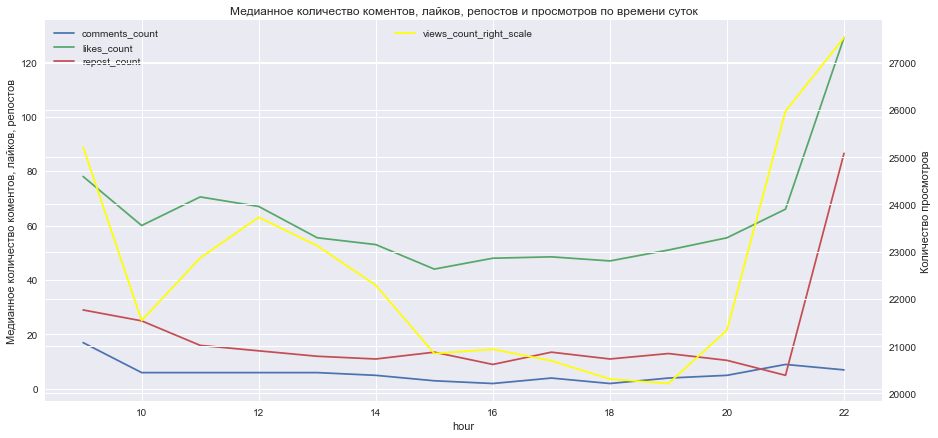

In [5]:
# build a distribution graph of the median number of comments, likes, views and reposts by post time
data = data_1
fig = plt.subplots(figsize=(15,7))

for col_name in data.columns[0:3]:
    ax = sns.lineplot(data=data, x=data.index, y=col_name, ci=None, label=col_name)
ax2 = ax.twinx()
ax2 = sns.lineplot(data=data, x=data.index, y=data.views_count, ci=None, label='views_count_right_scale', color='yellow')
ax.legend()
ax2.legend(loc='upper center')

ax.set_title('Медианное количество коментов, лайков, репостов и просмотров по времени суток') 
ax.set_ylabel('Медианное количество коментов, лайков, репостов') 
ax2.set_ylabel('Количество просмотров')
plt.show()

All graphs of activity indicators of visitors to the Skillbox public on VK have a curved shape, that is, users are most active in posts published in the first half and end of the day. Peak values are reached at the end of the day (starting at 8 pm). This is logical given the fact that most of the visitors to the public (and these are, first of all, current and potential Skillbox students) either work or study during the day.

In [6]:
data_2 = df.groupby(['month_num'], as_index = False)['comments_count', 'likes_count', 'repost_count', 'views_count'].agg(['median'])
data_2.columns = ['comments_count', 'likes_count', 'repost_count', 'views_count']
data_2

<ipython-input-6-d03962786137>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_2 = df.groupby(['month_num'], as_index = False)['comments_count', 'likes_count', 'repost_count', 'views_count'].agg(['median'])


,comments_count,likes_count,repost_count,views_count
month_num,,,,
1,4,68.0,20.0,24425.0
2,4,57.0,13.0,22509.0
3,3,46.0,13.0,19825.0
4,5,55.0,15.0,19850.0
5,7,59.5,14.5,22466.5
6,4,45.0,12.0,20747.0
7,4,40.5,10.0,19537.0
8,3,50.0,12.0,20304.0
9,4,47.0,13.5,20632.5


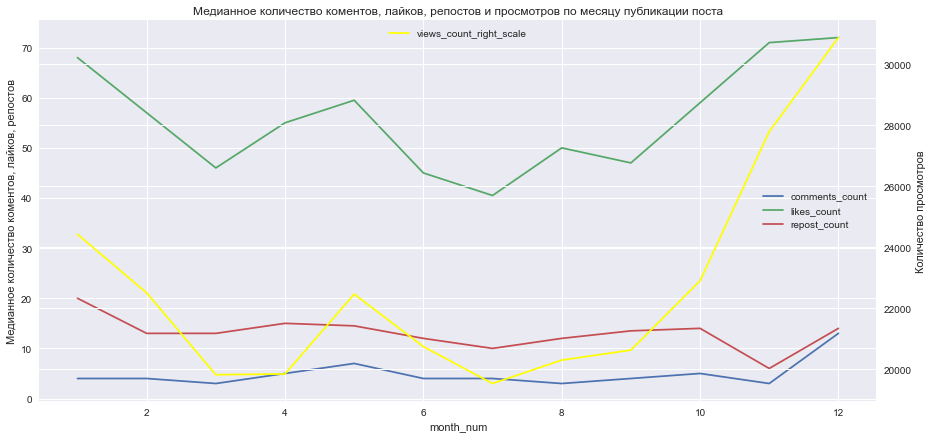

In [7]:
# build a graph of the distribution of the median number of comments, likes, views and reposts by month of the post
data = data_2
fig = plt.subplots(figsize=(15,7))

for col_name in data.columns[0:3]:
    ax = sns.lineplot(data=data, x=data.index, y=col_name, ci=None, label=col_name)
ax2 = ax.twinx()
ax2 = sns.lineplot(data=data, x=data.index, y=data.views_count, ci=None, label='views_count_right_scale', color='yellow')
ax.legend()
ax2.legend(loc='upper center')

ax.set_title('Медианное количество коментов, лайков, репостов и просмотров по месяцу публикации поста') 
ax.set_ylabel('Медианное количество коментов, лайков, репостов') 
ax2.set_ylabel('Количество просмотров')
plt.show()

According to the main parameters of the activity of visitors to the public throughout the year, 2 periods can be noted during which users are most active: from October to January and from April to June. This is logical and justified by the summer vacation period and the subsequent increase in activity (the closer to New Year, the it is higher) + the desire of users to change something in their lives with the approach of NG.

Based on 2 studies of the activity of visitors to the public by the time the post was published (by hours of the day and by months), the following can be recommended to the Skillbox marketing department:
* conduct long-term marketing campaigns to attract users to focus on the periods of the greatest activity / involvement of public visitors: from October to January and from April to June
* important posts and / or requiring quick response / user engagement should be published at the beginning and end of the day

In [8]:
# Using a regular expression, we will find headings that denote hashtags
df['search'] = df['text'].apply(lambda x: re.findall(r'#\w+', x))
data_3 = df.explode('search')
# We will find the headings that aroused the greatest interest of visitors, as well as the most unpopular.
data_3 = data_3.groupby(['search'])['post_date', 'likes_count'].agg({'post_date':'count', 'likes_count':'mean'})
popular = data_3.sort_values(by='likes_count', ascending=False).head(10)
unpopular = data_3.sort_values(by='likes_count').head(10)
unpopular

<ipython-input-8-5550d2509728>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_3 = data_3.groupby(['search'])['post_date', 'likes_count'].agg({'post_date':'count', 'likes_count':'mean'})


,post_date,likes_count
search,,
#Проще_говоря_Skillbox,1,12.0
#Skillbox_карьерныйплан,2,14.5
#Frontend_live,1,15.0
#Мыфронтенд,1,15.0
#Вамслово_Skillbox,1,16.0
#OFFF_Moscow,2,16.5
#Skillbox_работа,1,18.0
#проэтолето,1,18.0
#Skillbox_OFFF,6,19.0


The analysis of categories by popularity will show the SMM department the sections that aroused the greatest / least interest of the public's visitors. The category that users liked the most was "Skillbox_TED". Perhaps you should consider collaborating with popular sci-fi channels like TED? The most unpopular Skillbox. However, these rubrics were mentioned only once.

For greater representativeness, we will exclude rubrics that were mentioned less than the average number of mentions for all rubrics.

In [9]:
popular = data_3[data_3['post_date'] > data_3['post_date'].mean()].sort_values(by='likes_count', ascending=False).head(10)
unpopular = data_3[data_3['post_date'] > data_3['post_date'].mean()].sort_values(by='likes_count').head(10)
popular

,post_date,likes_count
search,,
#В_Закладки_Skillbox,27,181.185185
#В_закладки_Skillbox,91,180.582418
#Кейс_Skillbox,19,160.842105
#Skillbox_вдохновляет,23,145.521739
#Конкурс_Skillbox,14,138.000000
#Совет_препода_Skillbox,15,136.600000
#Skillbox_дизайн,149,134.959732
#Skillbox_маркетинг,86,111.348837
#Айдентика_Skillbox,11,108.181818


Thus, SMM will get a lot of food for thought and will be able to focus on the headings that cause the greatest interest of visitors.